In [34]:
import pandas as pd

In [35]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [36]:
df.shape

(5000, 14)

In [37]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [38]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3457,3458,55,31,91,94110,2,2.8,1,0,0,0,0,1,0
1515,1516,54,28,28,94305,4,1.5,3,0,0,0,0,1,1
1511,1512,58,32,65,90266,3,2.2,3,0,0,0,0,0,0
974,975,63,38,54,90401,3,2.2,1,0,0,0,0,1,0
3774,3775,51,26,52,92521,4,1.8,3,0,0,0,0,1,0


In [39]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [40]:
corr_matrix = df.corr()        # Calculate correlation matrix
sorted_corr = corr_matrix["Personal Loan"].sort_values(ascending=False)
print(sorted_corr)


Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt



<Axes: xlabel='Income', ylabel='Count'>

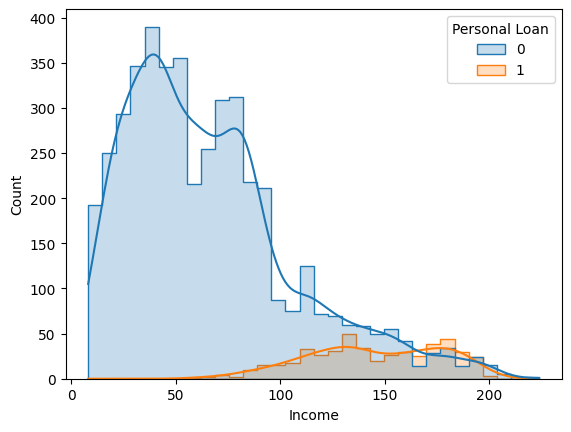

In [42]:
sns.histplot(data=df, x='Income', hue='Personal Loan', kde=True, element='step')


<Axes: xlabel='Education', ylabel='Count'>

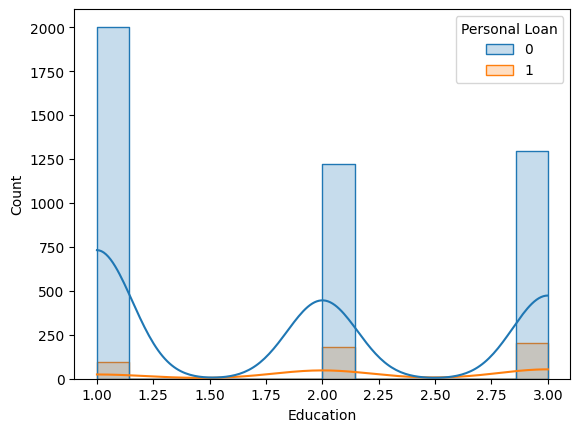

In [43]:
sns.histplot(data=df, x='Education',hue='Personal Loan', kde=True, element='step')

<Axes: xlabel='Personal Loan', ylabel='count'>

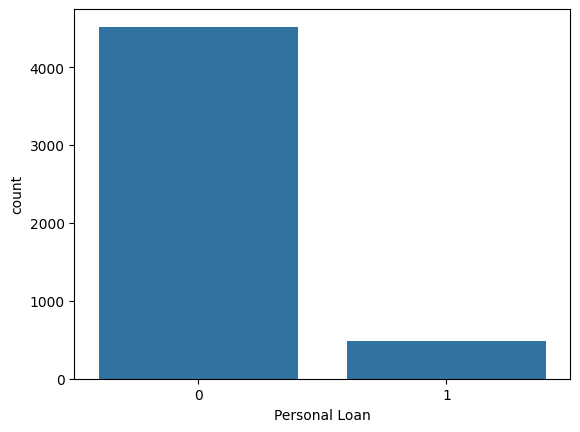

In [44]:
sns.countplot(x='Personal Loan', data=df)


<Axes: xlabel='Personal Loan', ylabel='Income'>

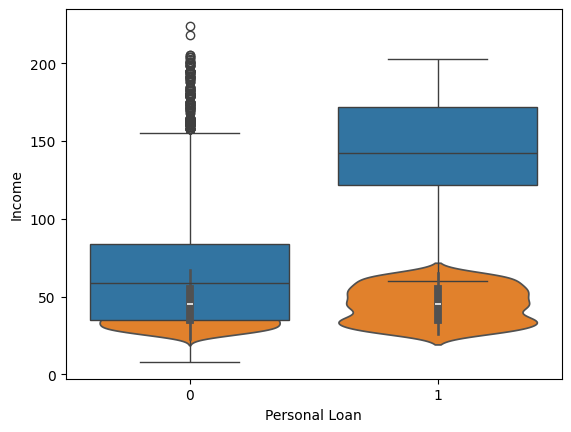

In [45]:
sns.boxplot(x='Personal Loan', y='Income', data=df)
sns.violinplot(x='Personal Loan', y='Age', data=df)


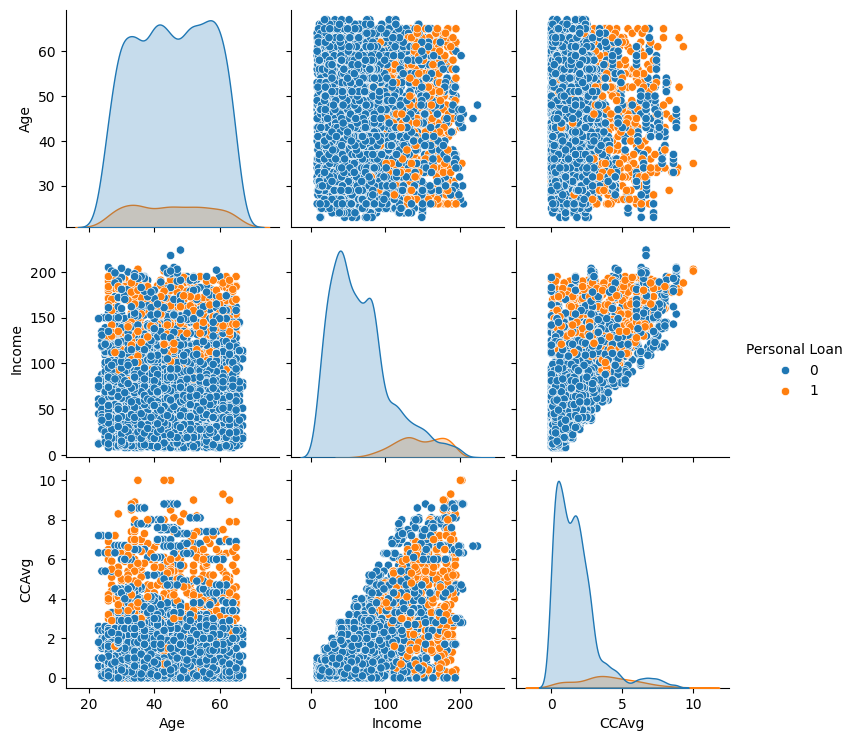

In [46]:
sns.pairplot(df, hue='Personal Loan', vars=['Age', 'Income', 'CCAvg'])


<Axes: >

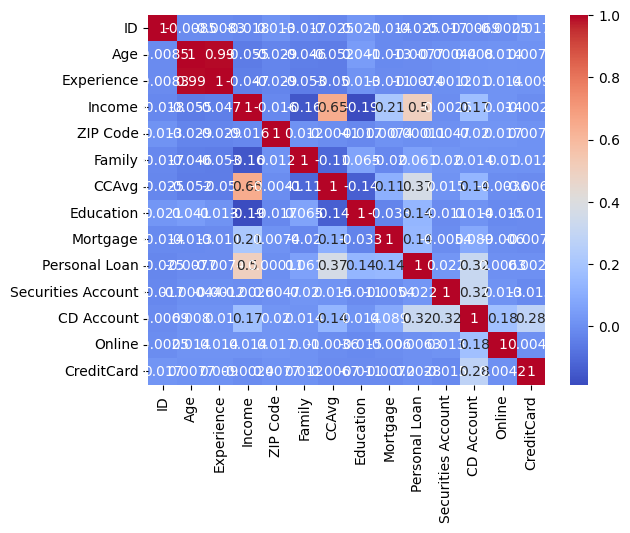

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Step 2: Drop irrelevant columns
df = df.drop(columns=['ID', 'ZIP Code'])  # These don't help the model

# Step 3: Features and Target
X = df.drop(columns=['Personal Loan'])  # Features
y = df['Personal Loan']  # Target

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Predictions and Evaluation
y_pred = model.predict(X_test_scaled)

print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.955

📊 Confusion Matrix:
 [[883  12]
 [ 33  72]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000



In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Accuracy: 0.886
🔍 Confusion Matrix:
 [[791 104]
 [ 10  95]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       895
           1       0.48      0.90      0.62       105

    accuracy                           0.89      1000
   macro avg       0.73      0.89      0.78      1000
weighted avg       0.93      0.89      0.90      1000



In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[880  15]
 [  4 101]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       895
           1       0.87      0.96      0.91       105

    accuracy                           0.98      1000
   macro avg       0.93      0.97      0.95      1000
weighted avg       0.98      0.98      0.98      1000



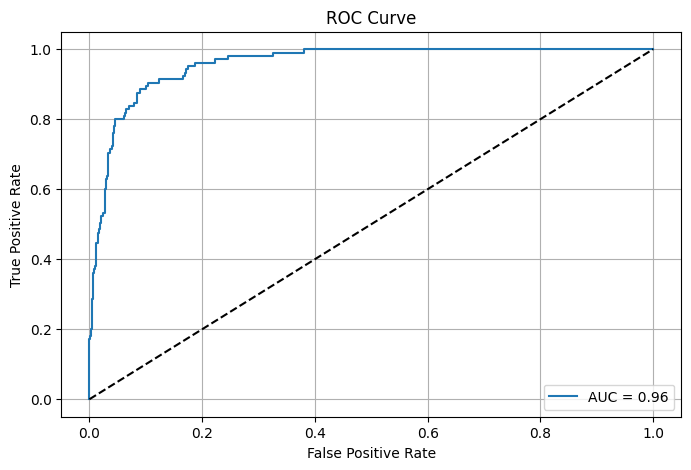

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC
auc_score = roc_auc_score(y_test, y_proba)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# Get feature names and coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create a DataFrame of coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print(coef_df)


               Feature  Coefficient
2               Income     2.581575
8           CD Account     0.885517
5            Education     0.652745
4                CCAvg     0.571066
1           Experience     0.558013
3               Family     0.381558
6             Mortgage     0.101837
0                  Age    -0.398969
7   Securities Account    -0.569657
9               Online    -0.649918
10          CreditCard    -0.925956
